/home/alex/.local/lib/python3.8/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


0    POLYGON ((30.41565 60.04671, 30.41888 60.04609...
Name: geometry, dtype: geometry


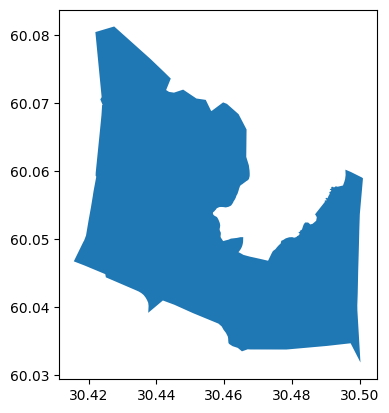

In [1]:
from ctypes import sizeof
import osmnx as ox
import geopandas as gpd

ox.config(use_cache=False, log_console=True)

#Получить границу области карты
gdf = ox.geocode_to_gdf(['Мурино, Ленинградская область, Россия'])
gdf.plot()
print(gdf['geometry'])

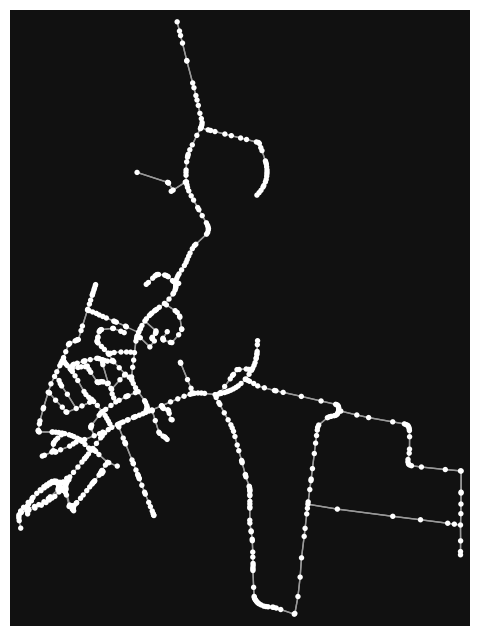

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [8]:
#Получить граф дорог из найденной области и сохранить в xml

polygon = gdf.iloc[0]['geometry']
G2 = ox.graph_from_polygon(polygon=polygon, network_type = 'drive', simplify=False)
ox.plot_graph(G2, figsize=(8, 8))
#ox.save_graph_xml(G, filepath='./graph.osm')

In [52]:
from formatter import NullFormatter

#Проверить что город существует 
query = {'city': ''}
try:
  gdf = ox.geocode_to_gdf(query)
except ValueError:
  print('Invalid city name')

ZeroDivisionError: division by zero

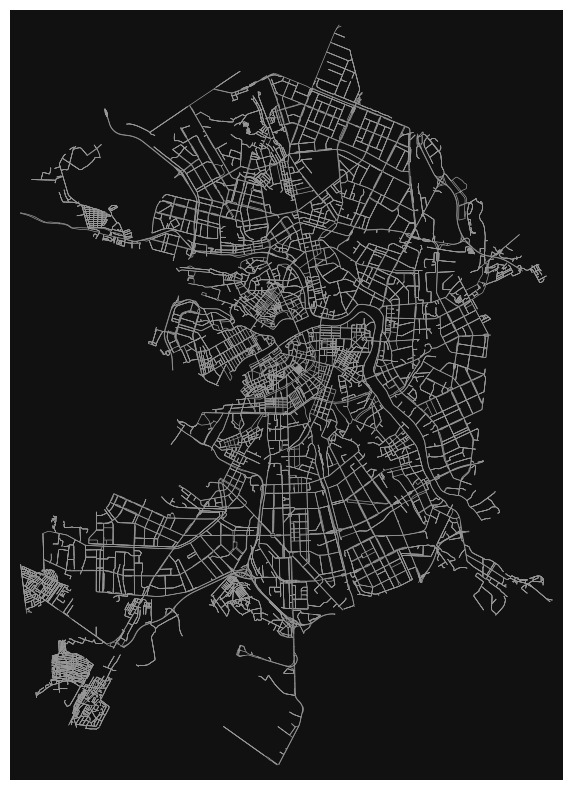

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot: >)

In [10]:
#Загрузить граф из xml документа
G = ox.graph_from_xml('./graph.osm')
ox.plot_graph(G, figsize=(10, 10), edge_linewidth=0.5, node_size=0)

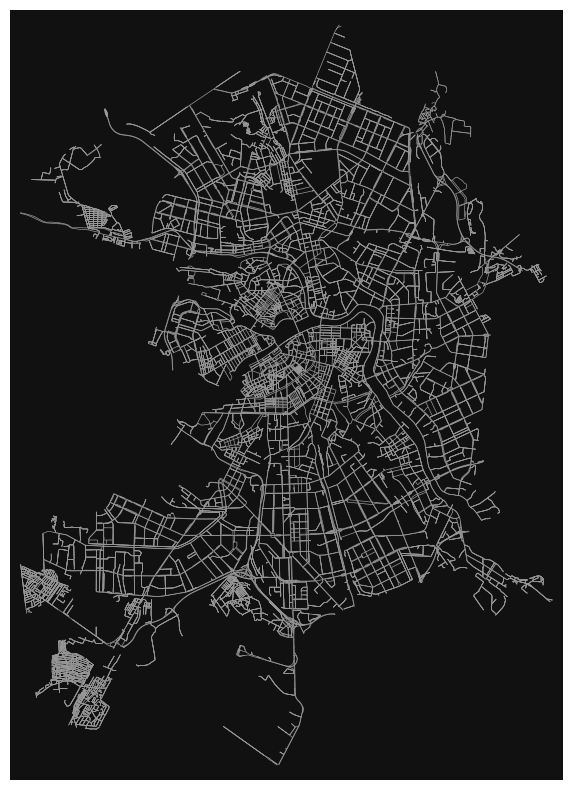

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot: >)

In [9]:
import networkx

#Соединение графов

G3 = networkx.compose(G2, G)
ox.plot_graph(G3, node_size=0, edge_linewidth=0.5, figsize=(10, 10))

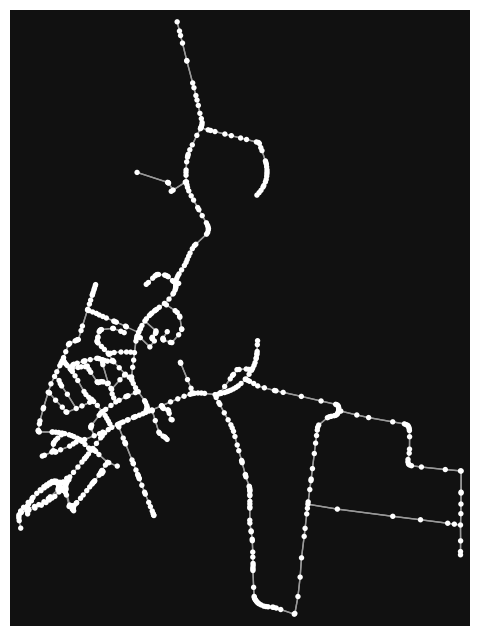

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [18]:
#Обрезать загруженный граф по полигону 

polygon = gdf.iloc[0]['geometry']

G4 = ox.truncate.truncate_graph_polygon(G3, polygon)

ox.plot_graph(G4)

<AxesSubplot: >

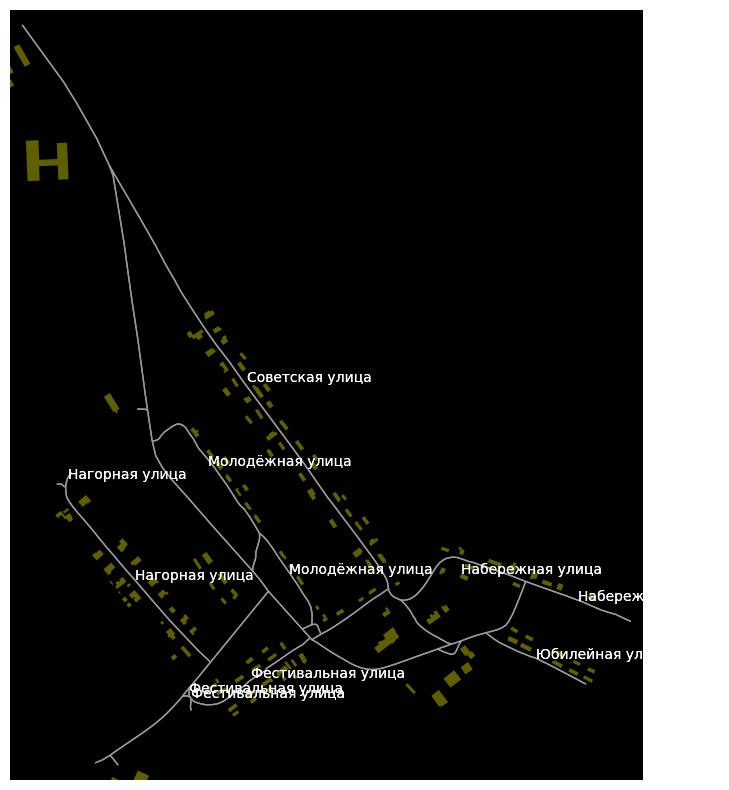

In [28]:
#Соединить здания и граф

gdf = ox.geometries_from_polygon(polygon=polygon, tags = {'building': True})
#ox.plot_footprints(gdf, figsize=(20, 20))
#ox.plot_graph(G, figsize=(20, 20))

G4 = ox.graph_from_polygon(polygon=polygon, network_type = 'drive', simplify=True)

fig, ax = ox.plot_graph(G4, bgcolor='k', node_size=0, show=False, close=False, figsize=(10, 10))

for _, edge in ox.graph_to_gdfs(G4, nodes=False).fillna('').iterrows():
    c = edge['geometry'].centroid
    ax.annotate(edge['name'], (c.x, c.y), c='w')

gdf.plot(ax=ax, color='y', alpha=0.5, figsize=(10, 10))


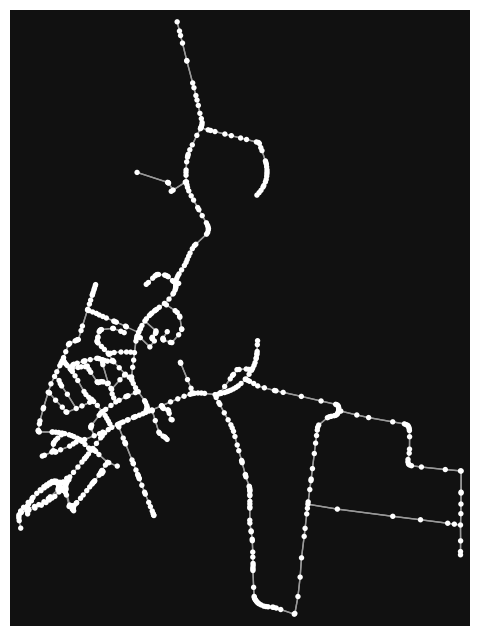

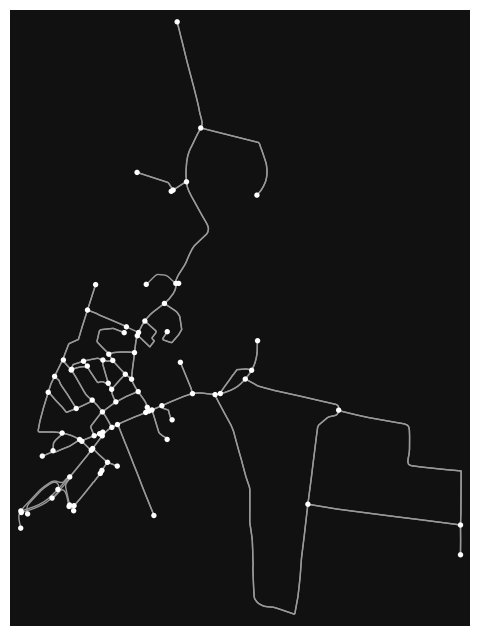

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [20]:
#Упрощение графа

G5 = ox.simplify_graph(G2)
ox.plot_graph(G2)
ox.plot_graph(G5)

<AxesSubplot: >

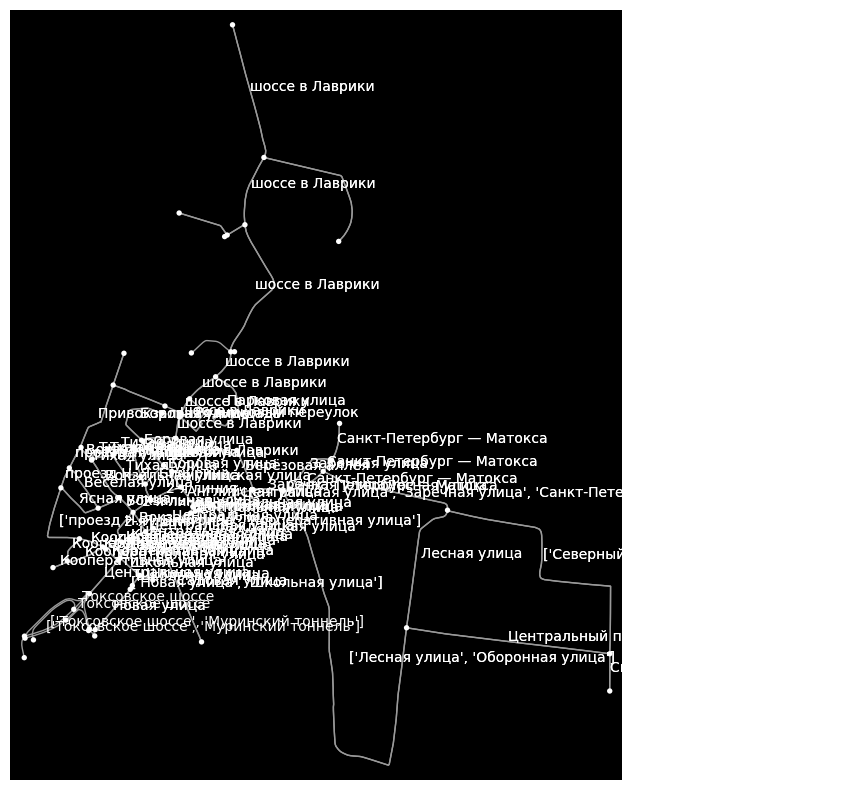

In [25]:
#df = ox.geometries_from_polygon(polygon=polygon, tags = {'building': True})
#ox.plot_footprints(gdf, figsize=(10, 10))
#ox.plot_graph(G, figsize=(10, 10))

gdf = ox.geometries_from_polygon(polygon=polygon, tags = {'building': True})

fig, ax = ox.plot_graph(G5, bgcolor='k', show=False, close=False, figsize=(10, 10))

for _, edge in ox.graph_to_gdfs(G5, nodes=False).fillna('').iterrows():
    c = edge['geometry'].centroid
    ax.annotate(edge['name'], (c.x, c.y), c='w')

gdf.plot(ax=ax, color='y', alpha=0.5, figsize=(10, 10))

In [43]:
import networkx as nx

G_line = nx.line_graph(G4)

print(G_line)
print(G4)

for edge in G4.edges():
    print(edge)

MultiDiGraph with 90 nodes and 252 edges
MultiDiGraph with 37 nodes and 90 edges
(1128193605, 1128193663)
(1128193605, 2363135561)
(1128193605, 1883541447)
(1128193605, 1128193644)
(1128193626, 1128193847)
(1128193626, 1883541447)
(1128193626, 1883547330)
(1128193644, 1885160586)
(1128193644, 1128193605)
(1128193644, 2363135562)
(1128193663, 1128193605)
(1128193685, 1883634576)
(1128193685, 1885160580)
(1128193685, 1883547330)
(1128193847, 1128193626)
(1128193847, 2360405880)
(1128193847, 1884921444)
(1712377837, 1883572273)
(1712377837, 1883472382)
(1712377837, 1885172956)
(1883472382, 1712377837)
(1883472382, 1884921455)
(1883472382, 1883634575)
(1883472384, 1884921455)
(1883541447, 1128193626)
(1883541447, 1128193605)
(1883541447, 2359938510)
(1883547330, 1128193685)
(1883547330, 1128193626)
(1883547330, 1883572272)
(1883572272, 1883547330)
(1883572272, 1883572273)
(1883572272, 1884054376)
(1883572273, 1883634576)
(1883572273, 1712377837)
(1883572273, 1883572272)
(1883634575, 188536